In [1]:
from google.colab import drive 
drive.mount("/content/drive/")

Mounted at /content/drive/


In [24]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import svm 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Data_loan.csv.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#number of rows and columns in the dataset 
df.shape 

(614, 13)

In [6]:
#statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#number of missing values in each column 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#dropping the missing values 
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.shape 

(480, 13)

In [11]:
#Label Encoding 
df.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [50]:
df.Credit_History.value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [14]:
#dependent column values 
df.Dependents.value_counts()


0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [15]:
#replacing the value of 3+ to four 
df=df.replace(to_replace="3+",value=4)

In [16]:
df.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization 

In [26]:
object_col=[feature for feature in df.columns if df[feature].dtypes=="O" and feature!="Loan_ID"] 

In [27]:
object_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

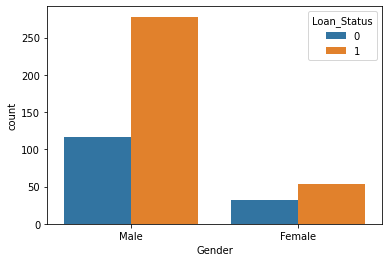

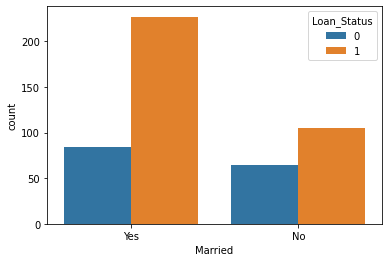

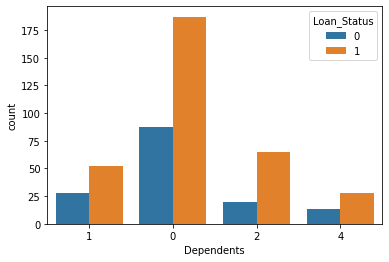

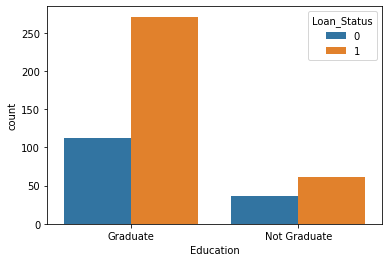

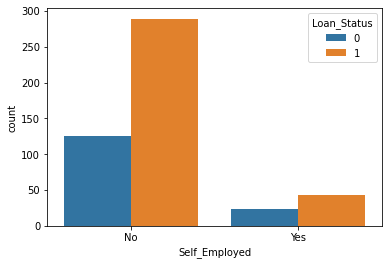

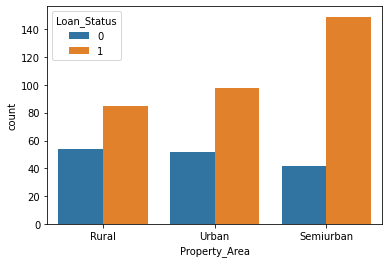

In [28]:
for i in object_col:
  sns.countplot(x=i,hue="Loan_Status",data=df);
  plt.show()

In [29]:
df.Married.value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [30]:
df.replace({"Married":{"No":0,"Yes":1},"Gender":{"Male":1,"Female":0},"Self_Employed":{"No":0,"Yes":1},"Property_Area":{"Rural":0,"Semiurban":1,"Urban":2},
          "Education":{"Graduate":1,"Not Graduate":0}},inplace=True)

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [32]:
#drop Loan_ID as it is irrelevant 
df.drop(['Loan_ID'],axis=1, inplace=True)

In [34]:
X=df.iloc[:,:11]

In [35]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [37]:
y=df.Loan_Status
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [38]:
#split into training and test data set
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42,test_size=0.2,stratify=y) 


In [39]:
X_train.shape

(384, 11)

In [40]:
X_test.shape

(96, 11)

Training the model:
Support Vector Machine Model 

In [55]:
classifier=svm.SVC(kernel="linear")

In [56]:
classifier.fit(X_train.values,y_train.values)

SVC(kernel='linear')

In [57]:
#accuracy_score on training data
prediction=classifier.predict(X_test.values)

In [58]:
accuracy=accuracy_score(y_test.values,prediction)

In [59]:
accuracy

0.8333333333333334

In [60]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [61]:
import pickle
file=open("model_svm.pkl","wb")
pickle.dump(classifier, file)

In [62]:
model=pickle.load(open("model_svm.pkl","rb"))

In [64]:
model.predict([[0,1,4,1,0,657.83,1234.65,6800.25,480,1,2]])[0]

0